# Analysis and Conclusions

In [1]:
import pandas as pd
import numpy as np
import pymysql
from sqlalchemy import create_engine
from getpass import getpass
from sqlalchemy import inspect
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import re
import geopy 

## Madrid split by districts

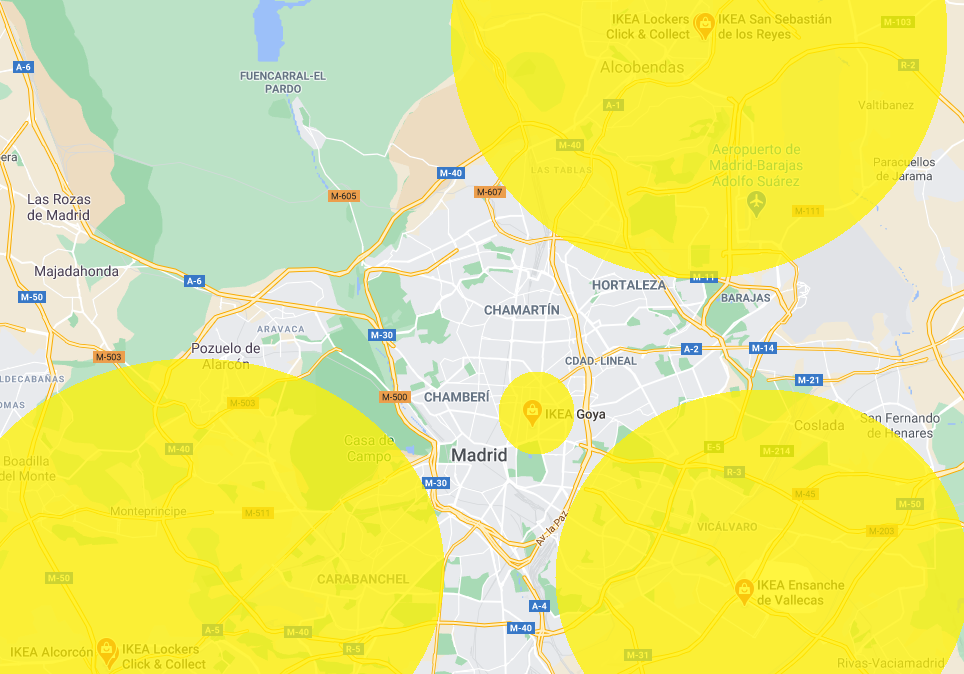

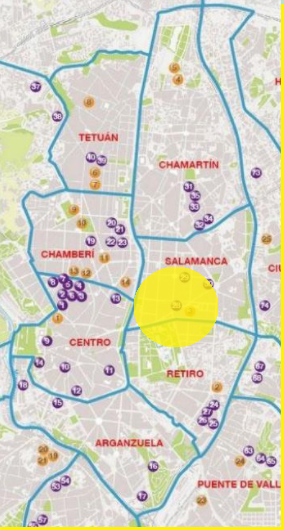

In [2]:
username='root'
password='password'
server='localhost'
database='madrid'
password=getpass()
engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')

········


In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['rent', 'sale']

## Focus on Selling Apartments

In [4]:
df = pd.read_sql_query('SELECT * FROM sale', engine)


In [5]:
df

id    price                     date  \
0     150476642  2200000  2021-02-19 15:40:40.138   
1     157313689   405000  2021-02-19 15:40:40.138   
2     153519540  1930000  2021-02-19 15:40:40.138   
3     154298390  1930000  2021-02-19 15:40:40.138   
4     158184418   485000  2021-02-19 15:40:40.138   
...         ...      ...                      ...   
9238  158823456   115000  2021-02-05 11:43:44.497   
9239  158823310   179000  2021-02-05 11:35:14.360   
9240  158823307   137000  2021-02-05 11:34:53.280   
9241  158823262   115000  2021-02-05 11:31:41.277   
9242  158823219   380000  2021-02-05 11:29:45.217   

                                   customer_description  \
0     GILMAR Consulting Inmobiliario Madrid, Conde O...   
1     Gilmar ofrece, magnifica Vivienda, Ubicada en ...   
2     Gilmar Mirasierra - Puerta de Hierro (91771777...   
3     Gilmar Mirasierra - Puerta de Hierro (91771777...   
4     Magnifica vivienda en Ciudad Jardín, \r\n\r\nP...   
...                                                 ...   
9238  Piso para actualizar en Zona Hellín.\r\n\r\nFa...   
9239  Magnífico dúplex loft a dos alturas, totalment...   
9240  Luminosa vivienda de 56 m2, amplio salón con c...   
9241  Fantástico Piso en zona Simancas, Impecable, t...   
9242  "Piso inteio, muy tranquilo en el corazón del ...   

                                           short_detail  \
0     faccion-jardin-terraza-trastero-patio-piscina/...   
1                    faccion-parking-ascensor/157313689   
2        king-jardin-terraza-trastero-piscina/153519540   
3        king-jardin-terraza-trastero-piscina/154298390   
4                            faccion-ascensor/158184418   
...                                                 ...   
9238                                  faccion/158823456   
9239  faccion-parking-terraza-ascensor-amueblado/158...   
9240                        faccion-amueblado/158823307   
9241                     faccion-no-amueblado/158823262   
9242         faccion-ascensor-patio-amueblado/158823219   

                                                address country neighborhood  \
0                                  Andarrios, Hortaleza  España    Hortaleza   
1                                             Chamartín  España    Chamartín   
2                                            Fuencarral  España   Fuencarral   
3                                            Fuencarral  España   Fuencarral   
4                                             Chamartín  España    Chamartín   
...                                                 ...     ...          ...   
9238              Calle de Hinojosa del Duque, San Blas  España     San Blas   
9239  Carretera de Vicálvaro a la Estac. O'donnell, ...  España     San Blas   
9240                          Calle Garganchón, Barajas  España      Barajas   
9241                         Calle de Zubieta, San Blas  España     San Blas   
9242         Calle del Conde de Peñalver, 30, Salamanca  España    Salamanca   

                    district  address.coordinates.accuracy  ...  bathrooms  \
0      Conde Orgaz - Piovera                             0  ...        5.0   
1                Prosperidad                             0  ...        1.0   
2     Tres Olivos - Valverde                             0  ...        6.0   
3     Tres Olivos - Valverde                             0  ...        6.0   
4              Ciudad Jardín                             0  ...        2.0   
...                      ...                           ...  ...        ...   
9238                  Hellín                             0  ...        1.0   
9239           Rosas - Musas                             0  ...        2.0   
9240              Aeropuerto                             0  ...        1.0   
9241                Simancas                             0  ...        1.0   
9242                    Goya                             1  ...        1.0   

      conservationState elevator  floor  parking  rooms  sur

## Query to get the needed infromation from SQL

In [31]:
overview_query = """select count(id) as Number_of_Appartments, 
neighborhood, round(avg(price),0) as Price, 
round(avg(surface), 0) as Surface, 
round(avg(rooms),0) as rooms from sale
group by neighborhood
order by Number_of_Appartments desc, 
surface desc;"""


In [32]:
overview = pd.read_sql_query(overview_query, engine)

In [33]:
overview['Number_of_Appartments'] = overview['Number_of_Appartments'].astype('int64')

In [34]:
overview['Price'] = overview['Price'].astype('int64')

In [35]:
overview['Surface'] = overview['Surface'].astype('int64')

In [36]:
overview['rooms'] = overview['rooms'].astype('int64')

In [37]:
overview

Number_of_Appartments        neighborhood    Price  Surface  rooms
0                     964              Centro   614980      115      3
1                     928           Salamanca  1046369      154      3
2                     610            Chamberí   822194      144      3
3                     590         Carabanchel   176702       79      3
4                     570              Tetuán   418917      107      3
5                     502           Chamartín  1063756      184      3
6                     481  Puente de Vallecas   139109       71      2
7                     459            San Blas   269114       93      3
8                     424             Moncloa  1111446      345      4
9                     415       Ciudad Lineal   359417      102      3
10                    413          Villaverde   160356       81      3
11                    410           Hortaleza   814188      203      3
12                    390          Arganzuela   346349       86      2
13                    364          Fuencarral   708106      213      4
14                    359              Retiro   669887      127      3
15                    349              Latina   180506       78      3
16                    308           Vicálvaro   243861      102      3
17                    245               Usera   164136       84      3
18                    220   Villa de Vallecas   183272       79      2
19                    132             Barajas   432193      146      3
20                    108           Moratalaz   219503       84      3
21                      2                None  1027500      176      4

I've detected strange value in the surface, I will find the outliers and clean them.

## Get rid of the Extreme Values

In [36]:
df = df.set_index(df['id'])

In [43]:
surface.describe().T

count      9257.000000
mean        181.735335
std        3531.296163
min           1.000000
25%          65.000000
50%          90.000000
75%         140.000000
max      267000.000000
Name: surface, dtype: float64

In [45]:
surface.max()

267000.0

In [46]:
surface.min()

1.0

In [55]:
df.shape

(9280, 23)

In [98]:
df.loc[df['surface']<14]

id   price                     date  \
462   158291676  129000  2021-02-28 04:30:01.497   
977   158977189  142559  2021-02-19 05:11:02.167   
1898  158963542  145760  2021-02-18 05:15:31.333   
2662  158945561  125000  2021-02-17 05:19:46.710   
2673  158945291   98000  2021-02-17 05:07:36.603   
2680  158945156  135000  2021-02-17 05:03:03.547   
3776  158922362  145000  2021-02-15 11:28:54.230   
3958  158915725  110000  2021-02-15 07:26:23.950   
3960  158915709  134000  2021-02-15 07:25:56.950   
3983  158303674   87852  2021-02-15 05:30:22.797   
8426  158291670  108000  2021-02-09 04:09:03.560   
8952  158307884  105900  2021-02-07 02:58:28.960   

                                   customer_description  \
462   ¿Busca algo en especial ¿Quieres disfrutar de ...   
977   Piso en edificio de siete alturas sobre rasant...   
1898  La vivienda tiene una superficie de 97 metros ...   
2662  Oportunidad de adquirir este piso muy luminoso...   
2673  ¿Busca algo en especial ¿Quieres disfrutar de ...   
2680  ¿Busca algo en especial ¿Quieres disfrutar de ...   
3776  Piso en venta en Madrid (Madrid) SERVANDO BATA...   
3958  Piso en venta en Usera, Madrid (Madrid) FERROV...   
3960   Piso en venta en Madrid (Madrid) PUERTO ALMANSA.   
3983  Tapiado.  Vivienda en la planta semisótano, de...   
8426  ¿Busca algo en especial ¿Quieres disfrutar de ...   
8952  Inmobiliaria Eduardo Molet, pone en exclusiva ...   

                            short_detail             address country  \
462       bajadores---lavapies/158291676              Centro  España   
977            uerta-del-angel/158977189              Latina  España   
1898                           158963542         Carabanchel  España   
2662                           158945561  Puente de Vallecas  España   
2673                           158945291               Usera  España   
2680                           158945156       Ciudad Lineal  España   
3776               ueblo-nuevo/158922362       Ciudad Lineal  España   
3958                           158915725               Usera  España   
3960                        go/158915709  Puente de Vallecas  España   
3983                           158303674         Carabanchel  España   
8426                           158291670               Usera  España   
8952  faccion-terraza-ascensor/158307884               Usera  España   

            neighborhood                district  \
462               Centro  Embajadores - Lavapiés   
977               Latina        Puerta del Ángel   
1898         Carabanchel              San Isidro   
2662  Puente de Vallecas               Entrevías   
2673               Usera             Almendrales   
2680       Ciudad Lineal                  Ventas   
3776       Ciudad Lineal            Pueblo Nuevo   
3958               Usera             Almendrales   
3960  Puente de Vallecas               San Diego   
3983         Carabanchel              San Isidro   
8426               Usera             Almendrales   
8952               Usera               Orcasitas   

      address.coordinates.accuracy  ...  bathrooms  conservationState  \
462                              0  ...        1.0                NaN   
977                              0  ...        1.0                NaN   
1898                             0  ...        2.0                NaN   
2662                             0  ...        3.0                NaN   
2673                             0  ...        1.0                NaN   
2680                             0  ...        1.0                NaN   
3776                             0  ...        NaN                NaN   
3958                             0  ...        NaN                NaN   
3960                             0  ...        NaN                NaN   
3983                             0  ...        1.0                NaN   
8426                             0  ...        1.0                NaN   
8952                             0  ...        1.0                NaN   

    

After analysis I've decided remove the 12 rows where the surface is less than 14m

In [99]:
df.loc[df['surface']<14]

id   price                     date  \
462   158291676  129000  2021-02-28 04:30:01.497   
977   158977189  142559  2021-02-19 05:11:02.167   
1898  158963542  145760  2021-02-18 05:15:31.333   
2662  158945561  125000  2021-02-17 05:19:46.710   
2673  158945291   98000  2021-02-17 05:07:36.603   
2680  158945156  135000  2021-02-17 05:03:03.547   
3776  158922362  145000  2021-02-15 11:28:54.230   
3958  158915725  110000  2021-02-15 07:26:23.950   
3960  158915709  134000  2021-02-15 07:25:56.950   
3983  158303674   87852  2021-02-15 05:30:22.797   
8426  158291670  108000  2021-02-09 04:09:03.560   
8952  158307884  105900  2021-02-07 02:58:28.960   

                                   customer_description  \
462   ¿Busca algo en especial ¿Quieres disfrutar de ...   
977   Piso en edificio de siete alturas sobre rasant...   
1898  La vivienda tiene una superficie de 97 metros ...   
2662  Oportunidad de adquirir este piso muy luminoso...   
2673  ¿Busca algo en especial ¿Quieres disfrutar de ...   
2680  ¿Busca algo en especial ¿Quieres disfrutar de ...   
3776  Piso en venta en Madrid (Madrid) SERVANDO BATA...   
3958  Piso en venta en Usera, Madrid (Madrid) FERROV...   
3960   Piso en venta en Madrid (Madrid) PUERTO ALMANSA.   
3983  Tapiado.  Vivienda en la planta semisótano, de...   
8426  ¿Busca algo en especial ¿Quieres disfrutar de ...   
8952  Inmobiliaria Eduardo Molet, pone en exclusiva ...   

                            short_detail             address country  \
462       bajadores---lavapies/158291676              Centro  España   
977            uerta-del-angel/158977189              Latina  España   
1898                           158963542         Carabanchel  España   
2662                           158945561  Puente de Vallecas  España   
2673                           158945291               Usera  España   
2680                           158945156       Ciudad Lineal  España   
3776               ueblo-nuevo/158922362       Ciudad Lineal  España   
3958                           158915725               Usera  España   
3960                        go/158915709  Puente de Vallecas  España   
3983                           158303674         Carabanchel  España   
8426                           158291670               Usera  España   
8952  faccion-terraza-ascensor/158307884               Usera  España   

            neighborhood                district  \
462               Centro  Embajadores - Lavapiés   
977               Latina        Puerta del Ángel   
1898         Carabanchel              San Isidro   
2662  Puente de Vallecas               Entrevías   
2673               Usera             Almendrales   
2680       Ciudad Lineal                  Ventas   
3776       Ciudad Lineal            Pueblo Nuevo   
3958               Usera             Almendrales   
3960  Puente de Vallecas               San Diego   
3983         Carabanchel              San Isidro   
8426               Usera             Almendrales   
8952               Usera               Orcasitas   

      address.coordinates.accuracy  ...  bathrooms  conservationState  \
462                              0  ...        1.0                NaN   
977                              0  ...        1.0                NaN   
1898                             0  ...        2.0                NaN   
2662                             0  ...        3.0                NaN   
2673                             0  ...        1.0                NaN   
2680                             0  ...        1.0                NaN   
3776                             0  ...        NaN                NaN   
3958                             0  ...        NaN                NaN   
3960                             0  ...        NaN                NaN   
3983                             0  ...        1.0                NaN   
8426                             0  ...        1.0                NaN   
8952                             0  ...        1.0                NaN   

    

## Remove NAM for Surface

In [106]:
wrong_surface = df.loc[df['surface']<14]
df = df.drop(wrong_surface.index, axis=0)

In [107]:
df = df.drop(wrong_surface.index, axis=0)

As surface is a needed filter I've decided to remove surface nam

In [118]:
df = df.dropna(subset=['surface'])

In [127]:
df['surface']

0       554.0
1        80.0
2       547.0
3       547.0
4       133.0
        ...  
9275     62.0
9276     83.0
9277     56.0
9278     48.0
9279     90.0
Name: surface, Length: 9245, dtype: float64

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface'>

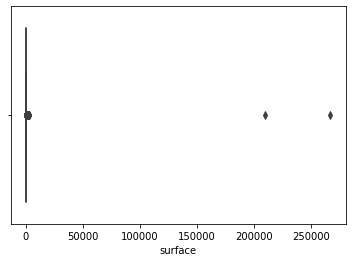

In [142]:
sns.boxplot(df.surface)

In [145]:
summary_surface = df['surface'].describe()

In [146]:
summary_surface

count      9245.000000
mean        181.969389
std        3533.581496
min          14.000000
25%          65.000000
50%          90.000000
75%         140.000000
max      267000.000000
Name: surface, dtype: float64

## OUTLIERS - IQR, BOXPLOT and Z-SCORE

In [147]:
summary_surface['IQR']=summary_surface['75%']-summary_surface['25%']

In [148]:
summary_surface

count      9245.000000
mean        181.969389
std        3533.581496
min          14.000000
25%          65.000000
50%          90.000000
75%         140.000000
max      267000.000000
IQR          75.000000
Name: surface, dtype: float64

In [154]:
summary_surface['cutoff']=summary_surface.IQR*1.6
summary_surface = pd.DataFrame(summary_surface)

AttributeError: 'DataFrame' object has no attribute 'IQR'

In [157]:
summary_surface

count        mean          std   min   25%   50%    75%       max  \
surface  9245.0  181.969389  3533.581496  14.0  65.0  90.0  140.0  267000.0   

          IQR  cutoff  
surface  75.0   120.0

In [163]:
summary_surface['lw']=summary_surface['25%']-summary_surface.cutoff
summary_surface['rw']=summary_surface['75%']+summary_surface.cutoff

In [164]:
summary_surface

count        mean          std   min   25%   50%    75%       max  \
surface  9245.0  181.969389  3533.581496  14.0  65.0  90.0  140.0  267000.0   

          IQR  cutoff    lw     rw  
surface  75.0   120.0 -55.0  260.0

In [170]:
df.loc[df['surface']>260]

id    price                     date  \
0     150476642  2200000  2021-02-19 15:40:40.138   
2     153519540  1930000  2021-02-19 15:40:40.138   
3     154298390  1930000  2021-02-19 15:40:40.138   
9     158870851  3100000  2021-02-10 10:45:01.940   
30    158651162  2000000  2021-02-19 08:45:42.320   
...         ...      ...                      ...   
9249  157086355   950000  2021-02-05 12:24:40.663   
9250  157084888  1890000  2021-02-05 12:24:40.603   
9251  158034981  1800000  2021-02-05 12:24:40.603   
9256  157085497  6300000  2021-02-05 12:24:40.400   
9260  158050862  1150000  2021-02-05 12:18:40.887   

                                   customer_description  \
0     GILMAR Consulting Inmobiliario Madrid, Conde O...   
2     Gilmar Mirasierra - Puerta de Hierro (91771777...   
3     Gilmar Mirasierra - Puerta de Hierro (91771777...   
9     Piso a estrenar en edificio representativo, co...   
30    Magnifica vivienda ubicada en el centro de Mad...   
...                                                 ...   
9249  Engel & Völkers presenta esta parcela con gran...   
9250  Engel & Völkers, inmobiliaria de lujo en Madri...   
9251  Engel & Völkers se complace en presentarles es...   
9256  Magnifica y señorial vivienda de 480 m² en edi...   
9260  Gilmar Consulting Inmobiliario presenta para s...   

                                           short_detail  \
0     faccion-jardin-terraza-trastero-patio-piscina/...   
2        king-jardin-terraza-trastero-piscina/153519540   
3        king-jardin-terraza-trastero-piscina/154298390   
9                 faccion-ascensor-television/158870851   
30      faccion-ascensor-parking-no-amueblado/158651162   
...                                                 ...   
9249  king-jardin-terraza-piscina-no-amueblado/15708...   
9250  faccion-parking-terraza-trastero-ascensor-no-a...   
9251  faccion-parking-jardin-terraza-trastero-patio-...   
9256  faccion-parking-terraza-trastero-no-amueblado/...   
9260                         faccion-ascensor/158050862   

                          address country neighborhood  \
0            Andarrios, Hortaleza  España    Hortaleza   
2                      Fuencarral  España   Fuencarral   
3                      Fuencarral  España   Fuencarral   
9                       Salamanca  España    Salamanca   
30                         Centro  España       Centro   
...                           ...     ...          ...   
9249                      Moncloa  España      Moncloa   
9250                    Salamanca  España    Salamanca   
9251     Siro Muela, 24, San Blas  España     San Blas   
9256                    Salamanca  España    Salamanca   
9260  Calle del Almirante, Centro  España       Centro   

                       district  address.coordinates.accuracy  ...  bathrooms  \
0         Conde Orgaz - Piovera                             0  ...        5.0   
2        Tres Olivos - Valverde                             0  ...        6.0   
3        Tres Olivos - Valverde                             0  ...        6.0   
9                     Recoletos                             0  ...        5.0   
30                      Palacio                             0  ...        4.0   
...                         ...                           ...  ...        ...   
9249  La Florida -  El  Plantío                             0  ...        3.0   
9250                 Castellana                             0  ...        4.0   
9251                   Salvador                             1  ...        7.0   
9256                 Castellana                             0  ...        4.0   
9260          Justicia - Chueca                             0  ...        5.0   

      conservationState elevator  floor  parking  rooms  surface  terrace  \
0                   2.0      NaN    NaN      NaN    5.0    554.0      1.0   
2                   1.0      NaN    NaN      NaN    5.0    547.0      1.0   
3                   1.0      NaN    NaN      NaN    5.0  

I can't use IQR since I will remove about 10% of entries (This 10 % brings a lot of money)

Let's try to remove 0.27 % of outliers at the right(high values)

In [203]:
summary_z = pd.DataFrame(df['surface'].describe())

In [204]:
summary_z = (summary_z).T

In [205]:
summary_z['lbound']=summary_z['mean']-3*summary_z['std']
summary_z['rbound']=summary_z['mean']+3*summary_z['std']

In [206]:
summary_z

count        mean         std   min   25%   50%    75%     max  \
surface  9243.0  130.402142  140.473213  14.0  65.0  90.0  140.0  2700.0   

             lbound      rbound  
surface -291.017498  551.821782

In [209]:
outliers = df.loc[df['surface']>10782]

id    price                     date  \
0     150476642  2200000  2021-02-19 15:40:40.138   
162   157315441  1900000  2021-02-17 06:19:22.800   
213   157938017  2850000  2021-02-14 06:25:47.487   
266   157310389  2950000  2021-02-10 08:47:27.287   
349   158802943  1375000  2021-02-03 17:36:33.493   
...         ...      ...                      ...   
8897  129014252  2300000  2021-02-07 10:00:21.393   
8924  148722557  7800000  2021-02-07 06:14:04.363   
8977  156247167  2890000  2021-02-06 20:00:21.983   
9213  156123479  1650000  2021-02-05 14:00:23.940   
9238  157085651  2995000  2021-02-05 12:24:41.663   

                                   customer_description  \
0     GILMAR Consulting Inmobiliario Madrid, Conde O...   
162   LA FLORIDA, urbanización cerrada de 7 chalets,...   
213   Chalet LINDANDO con EL PARDO, impresionantes v...   
266   GILMAR MIRASIERRA, LES PRESENTA ESTE IMPRESION...   
349   chalet pareado en aravaca mejor zona - diploma...   
...                                                 ...   
8897  Recien reformado.\r\nParking para 10 vehículos...   
8924  Se vende EN EL ESTADO ACTUAL por 3.000.000€. U...   
8977  Engel & Völkers Mirasierra – Puerta de Hierro ...   
9213  El Viso Inmobiliaria ofrece pareado de 600 m2c...   
9238  Engel & Völkers ofrece este gran piso en el qu...   

                                           short_detail  \
0     faccion-jardin-terraza-trastero-patio-piscina/...   
162   faccion-parking-jardin-terraza-trastero-patio-...   
213   faccion-parking-jardin-terraza-trastero-patio-...   
266            faccion-parking-jardin-piscina/157310389   
349   faccion-parking-jardin-terraza-trastero-piscin...   
...                                                 ...   
8897  faccion-parking-jardin-patio-piscina-amueblado...   
8924  faccion-parking-jardin-terraza-trastero-patio-...   
8977  faccion-parking-jardin-terraza-trastero-piscin...   
9213   faccion-parking-jardin-terraza-piscina/156123479   
9238  faccion-parking-trastero-ascensor-no-amueblado...   

                    address country neighborhood                   district  \
0      Andarrios, Hortaleza  España    Hortaleza      Conde Orgaz - Piovera   
162                 Moncloa  España      Moncloa  La Florida -  El  Plantío   
213                 Moncloa  España      Moncloa  La Florida -  El  Plantío   
266              Fuencarral  España   Fuencarral                 Mirasierra   
349                 Moncloa  España      Moncloa                    Aravaca   
...                     ...     ...          ...                        ...   
8897  Valcotos, 13, Moncloa  España      Moncloa                 Valdemarín   
8924    Amorebieta, Moncloa  España      Moncloa  La Florida -  El  Plantío   
8977             Fuencarral  España   Fuencarral                 Mirasierra   
9213                Moncloa  España      Moncloa                    Aravaca   
9238              Chamartín  España    Chamartín                    El Viso   

      address.coordinates.accuracy  ...  bathrooms  conservationState  \
0                                0  ...        5.0                2.0   
162                              0  ...        8.0                2.0   
213                              0  ...        5.0                4.0   
266                              0  ...        4.0                1.0   
349                              0  ...        5.0                2.0   
...                            ...  ...        ...                ...   
8897                             1  ...        9.0                2.0   
8924                             0  ...        9.0                1.0   
8977                             0  ...        5.0                1.0   
9213                             0  ...        7.0                NaN   
9238                             0  ...        5.0                NaN   

     elevator  floor  parking  rooms  surface  terrace  \
0         NaN    NaN      NaN    5.0    554.0      1.0   
162       NaN   

In [184]:
df = df.drop(outliers.index, axis=0)


In [208]:
df['surface'].describe()

count    9243.000000
mean      130.402142
std       140.473213
min        14.000000
25%        65.000000
50%        90.000000
75%       140.000000
max      2700.000000
Name: surface, dtype: float64

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface'>

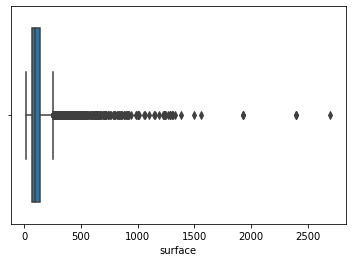

In [198]:
sns.boxplot(df.surface)

In [210]:
df.to_sql('sale', con=engine,index=False,if_exists='replace')

In [211]:
overview_query = """select count(id) as Number_of_Appartments, 
neighborhood, round(avg(price),0) as Price, 
round(avg(surface), 0) as Surface, 
round(avg(rooms),0) as rooms from sale
group by neighborhood
order by Number_of_Appartments desc, 
surface desc;"""


In [212]:
overview = pd.read_sql_query(overview_query, engine)

In [46]:
overview

Number_of_Appartments        neighborhood    Price  Surface  rooms
0                     964              Centro   614980      115      3
1                     928           Salamanca  1046369      154      3
2                     610            Chamberí   822194      144      3
3                     590         Carabanchel   176702       79      3
4                     570              Tetuán   418917      107      3
5                     502           Chamartín  1063756      184      3
6                     481  Puente de Vallecas   139109       71      2
7                     459            San Blas   269114       93      3
8                     424             Moncloa  1111446      345      4
9                     415       Ciudad Lineal   359417      102      3
10                    413          Villaverde   160356       81      3
11                    410           Hortaleza   814188      203      3
12                    390          Arganzuela   346349       86      2
13                    364          Fuencarral   708106      213      4
14                    359              Retiro   669887      127      3
15                    349              Latina   180506       78      3
16                    308           Vicálvaro   243861      102      3
17                    245               Usera   164136       84      3
18                    220   Villa de Vallecas   183272       79      2
19                    132             Barajas   432193      146      3
20                    108           Moratalaz   219503       84      3
21                      2                None  1027500      176      4

In [40]:
df.loc[df['neighborhood']=='Chamartín']

id    price                     date  \
1     157313689   405000  2021-02-19 15:40:40.138   
4     158184418   485000  2021-02-19 15:40:40.138   
46    144755439  2500000  2021-02-19 05:45:36.710   
148   157456739  1300000  2021-02-17 10:31:59.080   
180   158403234  1950000  2021-02-16 10:31:55.077   
...         ...      ...                      ...   
9153  158827309   690000  2021-02-05 16:31:18.743   
9156  156941951   375000  2021-02-05 16:25:15.393   
9201  157085651  2995000  2021-02-05 12:24:41.663   
9208  157086193  2300000  2021-02-05 12:24:40.863   
9221  158824180   219000  2021-02-05 12:21:37.163   

                                   customer_description  \
1     Gilmar ofrece, magnifica Vivienda, Ubicada en ...   
4     Magnifica vivienda en Ciudad Jardín, \r\n\r\nP...   
46    Al llegar a Calanda Homes, lo primero que le s...   
148   En el distrito de Chamartín concretamente en C...   
180   Magnífica vivienda ubicada en finca de los año...   
...                                                 ...   
9153  Inmejorables vistas. Situada en urbanización p...   
9156  Oportunidad. Precio rebajado. Ideal inversores...   
9201  Engel & Völkers ofrece este gran piso en el qu...   
9208  Engel & Volkers comercializa un fantástico Áti...   
9221  Inmejorable ubicación de este Estudio en el di...   

                                           short_detail  \
1                    faccion-parking-ascensor/157313689   
4                            faccion-ascensor/158184418   
46          bra-nueva/madrid-capital/19175497/144755439   
148   faccion-parking-jardin-terraza-trastero-ascens...   
180   faccion-parking-terraza-ascensor-internet/1584...   
...                                                 ...   
9153     za-zona-comunitaria-ascensor-piscina/158827309   
9156                 faccion-parking-ascensor/156941951   
9201  faccion-parking-trastero-ascensor-no-amueblado...   
9208    faccion-parking-trastero-no-amueblado/157086193   
9221                 faccion-trastero-parking/158824180   

                                        address country neighborhood  \
1                                     Chamartín  España    Chamartín   
4                                     Chamartín  España    Chamartín   
46              Avenida de Burgos, 5, Chamartín  España    Chamartín   
148                                   Chamartín  España    Chamartín   
180                                   Chamartín  España    Chamartín   
...                                         ...     ...          ...   
9153              Avenida de Pío XII, Chamartín  España    Chamartín   
9156                  Doctor Fleming, Chamartín  España    Chamartín   
9201                                  Chamartín  España    Chamartín   
9208                                  Chamartín  España    Chamartín   
9221  Avenida de Camilo José Cela, 1, Chamartín  España    Chamartín   

                       district  address.coordinates.accuracy  ...  bathrooms  \
1                   Prosperidad                             0  ...        1.0   
4                 Ciudad Jardín                             0  ...        2.0   
46                     Castilla                             1  ...        5.0   
148               Ciudad Jardín                             0  ...        3.0   
180                     El Viso                             0  ...        5.0   
...                         ...                           ...  ...        ...   
9153               Nueva España                             0  ...        2.0   
9156  Hispanoamérica - Bernabéu                             0  ...        1.0   
9201                    El Viso                             0  ...        5.0   
9208                    El Viso                             0  ...        4.0   
9221                Prosperidad                             1  ...        1.0   

      conservationState elevator  floor  parking  rooms  surface  terrace  \
1                   3.0      1.0    7.0    

In [41]:
(df[(df.neighborhood=='Chamartín')&(df.surface>500)])

id    price                     date  \
885   158353025  8700000  2021-02-19 06:17:26.947   
1330  157196164  2990000  2021-02-18 18:46:55.187   
1331  157195478  3590000  2021-02-18 18:46:55.093   
1736  149331217  2800000  2021-02-18 09:38:12.690   
2268  158574203  3600000  2021-02-17 15:42:42.077   
3342  156538384  2900000  2021-02-16 06:21:14.633   
3660  158927916  1700000  2021-02-15 15:54:59.490   
3855  155661230  8700000  2021-02-15 09:39:45.433   
3860  155661208  5800000  2021-02-15 09:39:45.200   
4751  157085099  4950000  2021-02-12 14:05:03.083   
4922  157376844  8700000  2021-02-12 09:28:29.527   
5987  157438350  8700000  2021-02-09 22:00:05.200   
6571  147046026  1700000  2021-02-09 22:00:05.200   
6745  156438604  4000000  2021-02-09 22:00:05.200   
7336  153272068  2200000  2021-02-09 22:00:05.200   
7902  153598010  2900000  2021-02-09 22:00:05.200   
8749  155995746  3700000  2021-02-08 05:00:02.913   
9201  157085651  2995000  2021-02-05 12:24:41.663   

                                   customer_description  \
885   Única Inmobiliaria presenta espectacular vivie...   
1330  gilmar Viso-chamartin ( 915830300) ubicado en ...   
1331  MAGNÍFICO PISO EN NUEVA ESPAÑA\r\n\r\nImpresio...   
1736  "Se vende ático-dúplex totalmente exterior y e...   
2268  Gran chalet de 450 m² de superficie con una pa...   
3342  DIZA Consultores les presenta formidable ático...   
3660  Magnifico piso situado en la zona de Pío XII, ...   
3855  Exclusiva vivienda de lujo en una parcela de 7...   
3860  Estupendo chalet independiente en El Viso de 8...   
4751  En una de las mejores zonas del Viso, a escaso...   
4922  PRO REALTY gestiona, sin cobrar honorarios al ...   
5987  Si está buscando una vivienda independiente en...   
6571  Magnifico piso situado en una tranquila zona a...   
6745  Impresionante casa en El Viso, distribuida, en...   
7336  Exclusiva vivienda exterior en muy buena finca...   
7902  Olisson gestiona la venta de esta estupenda vi...   
8749  Boss Inmobiliaria vende chalet adosado en urba...   
9201  Engel & Völkers ofrece este gran piso en el qu...   

                                           short_detail  \
885    faccion-parking-jardin-terraza-piscina/158353025   
1330  faccion-terraza-trastero-ascensor-parking-pisc...   
1331  faccion-parking-trastero-zona-comunitaria-asce...   
1736  faccion-parking-terraza-trastero-ascensor/1493...   
2268     king-jardin-terraza-trastero-piscina/158574203   
3342  faccion-parking-jardin-terraza-trastero-ascens...   
3660       king-terraza-trastero-no-amueblado/158927916   
3855  faccion-parking-jardin-terraza-trastero-piscin...   
3860  faccion-parking-jardin-terraza-trastero-piscin...   
4751  faccion-parking-jardin-terraza-trastero-piscin...   
4922  faccion-parking-terraza-trastero-piscina-parki...   
5987  king-terraza-trastero-patio-piscina-se-aceptan...   
6571  faccion-parking-trastero-zona-comunitaria-asce...   
6745           faccion-parking-jardin-terraza/156438604   
7336  faccion-parking-terraza-trastero-ascensor/1532...   
7902             king-trastero-ascensor-patio/153598010   
8749  faccion-parking-jardin-terraza-piscina-piscina...   
9201  faccion-parking-trastero-ascensor-no-amueblado...   

                      address country neighborhood      district  \
885                 Chamartín  España    Chamartín       El Viso   
1330                Chamartín  España    Chamartín  Nueva España   
1331                Chamartín  España    Chamartín  Nueva España   
1736                Chamartín  España    Chamartín       El Viso   
2268  De la Habana, Chamartín  España    Chamartín  Nueva España   
3342                Chamartín  España    Chamartín  Nueva España   
3660                Chamartín  España    Chamartín  Nueva España   
3855                Chamartín  España    Chamartín       El Viso   
3860                Chamartín  España    Chamartín       El Viso   
4751                Chamartín  España    Chamartín       El Viso   
4922         

In [44]:
(df[(df.neighborhood=='Moncloa')&(df.surface>500)])

id    price                     date  \
208   157938017  2850000  2021-02-14 06:25:47.487   
533   157952544  2339900  2021-02-19 13:02:15.130   
813   157202119  2044100  2021-02-19 06:33:31.503   
1084  157918645  3241600  2021-02-19 03:09:42.350   
1464  156130160  2500000  2021-02-18 16:00:22.597   
...         ...      ...                      ...   
8176  152845259  5700000  2021-02-09 13:33:51.097   
8392  154889949  2339900  2021-02-09 04:09:01.377   
8415  156316617  2530200  2021-02-09 00:00:02.217   
8861  129014252  2300000  2021-02-07 10:00:21.393   
8888  148722557  7800000  2021-02-07 06:14:04.363   

                                   customer_description  \
208   Chalet LINDANDO con EL PARDO, impresionantes v...   
533   Chalet independiente en venta en el Plantío, a...   
813   Maravilloso Chalet independiente con amplios e...   
1084  Vivienda en venta ubicado en Avenida CASA QUEM...   
1464  En Madrid en la zona de Aravaca Dentro de la e...   
...                                                 ...   
8176  Exclusiva vivienda independiente de 1.267 m2 e...   
8392  Chalet independiente en venta en el Plantío, a...   
8415  MR.HOUSE Real Estate comercializa espectacular...   
8861  Recien reformado.\r\nParking para 10 vehículos...   
8888  Se vende EN EL ESTADO ACTUAL por 3.000.000€. U...   

                                           short_detail  \
208   faccion-parking-jardin-terraza-trastero-patio-...   
533               king-jardin-terraza-piscina/157952544   
813   faccion-parking-terraza-trastero-piscina/15720...   
1084                   florida----el--plantio/157918645   
1464           faccion-jardin-terraza-piscina/156130160   
...                                                 ...   
8176     king-jardin-terraza-trastero-piscina/152845259   
8392                   king-terraza-amueblado/154889949   
8415  faccion-parking-jardin-terraza-trastero-piscin...   
8861  faccion-parking-jardin-patio-piscina-amueblado...   
8888  faccion-parking-jardin-terraza-trastero-patio-...   

                                  address country neighborhood  \
208                               Moncloa  España      Moncloa   
533                   Amoribieta, Moncloa  España      Moncloa   
813                    Horche, 4, Moncloa  España      Moncloa   
1084  Avenida de la Casa Quemada, Moncloa  España      Moncloa   
1464                              Moncloa  España      Moncloa   
...                                   ...     ...          ...   
8176                              Moncloa  España      Moncloa   
8392                  Amorebieta, Moncloa  España      Moncloa   
8415               De Valdemarín, Moncloa  España      Moncloa   
8861                Valcotos, 13, Moncloa  España      Moncloa   
8888                  Amorebieta, Moncloa  España      Moncloa   

                       district  address.coordinates.accuracy  ...  bathrooms  \
208   La Florida -  El  Plantío                             0  ...        5.0   
533   La Florida -  El  Plantío                             0  ...        6.0   
813                     Aravaca                             1  ...        8.0   
1084  La Florida -  El  Plantío                             0  ...        7.0   
1464  La Florida -  El  Plantío                             0  ...        7.0   
...                         ...                           ...  ...        ...   
8176                 Valdemarín                             0  ...        8.0   
8392  La Florida -  El  Plantío                             1  ...        6.0   
8415                 Valdemarín                             0  ...        6.0   
8861                 Valdemarín                             1  ...        9.0   
8888  La Florida -  El  Plantío                             0  ...        9.0   

      conservationState elevator  floor  parking  rooms  surface  terrace  \
208                 4.0      NaN    NaN      NaN    5.0   1000.0      1.0   
533                 3.0      NaN    Na

## Create a new Column with the percentage of apartments by neighborhood

In [ ]:
overview['%n_of_app_distrcitct']  

In [265]:
overview['%n_of_app_distrcitct']  = overview['Number_of_Appartments'].apply(lambda x :(x/overview['Number_of_Appartments'].sum())*100)

In [266]:
overview

Number_of_Appartments        neighborhood      Price  Surface  rooms  \
0                     964              Centro   614980.0    115.0    3.0   
1                     928           Salamanca  1046369.0    154.0    3.0   
2                     610            Chamberí   822194.0    144.0    3.0   
3                     590         Carabanchel   176702.0     79.0    3.0   
4                     570              Tetuán   418917.0    107.0    3.0   
5                     502           Chamartín  1063756.0    184.0    3.0   
6                     481  Puente de Vallecas   139109.0     71.0    2.0   
7                     459            San Blas   269114.0     93.0    3.0   
8                     424             Moncloa  1111446.0    345.0    4.0   
9                     415       Ciudad Lineal   359417.0    102.0    3.0   
10                    413          Villaverde   160356.0     81.0    3.0   
11                    410           Hortaleza   814188.0    203.0    3.0   
12                    390          Arganzuela   346349.0     86.0    2.0   
13                    364          Fuencarral   708106.0    213.0    4.0   
14                    359              Retiro   669887.0    127.0    3.0   
15                    349              Latina   180506.0     78.0    3.0   
16                    308           Vicálvaro   243861.0    102.0    3.0   
17                    245               Usera   164136.0     84.0    3.0   
18                    220   Villa de Vallecas   183272.0     79.0    2.0   
19                    132             Barajas   432193.0    146.0    3.0   
20                    108           Moratalaz   219503.0     84.0    3.0   
21                      2                None  1027500.0    176.0    4.0   

    %n_of_app_distrcitct  
0              10.429514  
1              10.040030  
2               6.599589  
3               6.383209  
4               6.166829  
5               5.431137  
6               5.203938  
7               4.965920  
8               4.587255  
9               4.489884  
10              4.468246  
11              4.435789  
12              4.219409  
13              3.938115  
14              3.884020  
15              3.775830  
16              3.332251  
17              2.650655  
18              2.380180  
19              1.428108  
20              1.168452  
21              0.021638

In [268]:
overview = overview.drop(21)

In [271]:
overview['%n_of_app_distrcitct'].diff()

0          NaN
1    -0.389484
2    -3.440441
3    -0.216380
4    -0.216380
5    -0.735692
6    -0.227199
7    -0.238018
8    -0.378665
9    -0.097371
10   -0.021638
11   -0.032457
12   -0.216380
13   -0.281294
14   -0.054095
15   -0.108190
16   -0.443579
17   -0.681597
18   -0.270475
19   -0.952072
20   -0.259656
Name: %n_of_app_distrcitct, dtype: float64

In [272]:
df.to_sql('sale', con=engine,index=False,if_exists='replace')

In [274]:
overview.to_csv('overview.csv') 

### Map with Amount of Appartments  for Sale by neighborhood

In [51]:
import folium
from geopy.geocoders import Nominatim
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:87.0) Gecko/20100101 Firefox/87.0'
geolocator = Nominatim(user_agent=user_agent)

In [6]:
table_map = df.groupby('neighborhood').agg({'id' : 'count', 'price_m2': np.mean, 'rooms': np.mean, 'bathrooms' : np.mean}).round(2).sort_values(by='id', ascending=False)

In [7]:
table_map.reset_index(inplace=True)

In [8]:

table_map['latitude'] = table_map['neighborhood'].apply(lambda x: geolocator.geocode(x+' Madrid').latitude)
table_map['longitude'] = table_map['neighborhood'].apply(lambda x: geolocator.geocode(x+' Madrid').longitude)

In [9]:
table_map.rename(columns={'id' : 'qty'}, inplace=True)

In [252]:
## Madrid Centre cooridnates are not correct since it is taking all the neighborhoods in the centre Madrid

### The right coordinates are:
* Latitude	40.416729
* Longitude	-3.703339

In [10]:
table_map.at[0, 'latitude'] = 40.416729

In [11]:

table_map.at[0, 'longitude'] = -3.703339

###  Lets plot the map 

In [40]:
# import the library
import folium
from geopy.geocoders import Nominatim
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'

# Make an empty map
m = folium.Map(location=[40.416729,-3.703339], tiles="OpenStreetMap", zoom_start=12)


# add marker one by one on the map
for i in range(0,len(table_map)):
   folium.Circle(
      location=[table_map.iloc[i]['latitude'], table_map.iloc[i]['longitude']],
      popup=table_map.iloc[i]['neighborhood'],
      radius=float(table_map.iloc[i]['qty'])*1.5,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

for i in range(0,len(table_map)):
   folium.Circle(
      location=[40.451938, -3.692748],
      radius=float(1682),
      color='green',
      fill=True, 
      fill_opacity=(0.05),
      fill_color='green'

      
   ).add_to(m)

folium.Marker(location=[40.4253339, -3.6823609]).add_to(m)


#Save the html
m.save('Circle_map_with_green_area_for_sale.html')


# Show the map again
m


###  Save the PNG file

In [13]:
#import libraries
import io
from PIL import Image

In [41]:
#Save the picture
img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('Circle_map_with_green_area_for_sale.png')

In [17]:
df1_map = df.groupby('neighborhood').agg({'id' : 'count'}).round(2).sort_values(by='id', ascending=False)

In [18]:
df2_map = df2.groupby('neighborhood').agg({'id' : 'count'}).round(2).sort_values(by='id', ascending=False)

In [26]:
df1_map.merge(df2_map, how='outer', on=df1_map.index)

key_0  id_x  id_y
0               Centro   964   397
1            Salamanca   928   312
2             Chamberí   610   247
3          Carabanchel   590   214
4               Tetuán   570   144
5            Chamartín   502   141
6   Puente de Vallecas   481   131
7             San Blas   459   111
8              Moncloa   424   110
9        Ciudad Lineal   415    94
10          Villaverde   413    69
11           Hortaleza   410    63
12          Arganzuela   390    55
13          Fuencarral   364    45
14              Retiro   359    39
15              Latina   349    25
16           Vicálvaro   308    20
17               Usera   245    19
18   Villa de Vallecas   220    14
19             Barajas   132    12
20           Moratalaz   108    11

In [34]:
table_map2 = df1_map.pivot_table(df2_map, index=df1_map.index, aggfunc='sum').sort_values(by='id', ascending=False)

In [37]:
table_map2.reset_index(inplace=True)
table_map2['latitude'] = table_map2['neighborhood'].apply(lambda x: geolocator.geocode(x+' Madrid').latitude)
table_map2['longitude'] = table_map2['neighborhood'].apply(lambda x: geolocator.geocode(x+' Madrid').longitude)

In [38]:
table_map2.rename(columns={'id' : 'qty'}, inplace=True)

In [39]:
table_map2.at[0, 'latitude'] = 40.416729
table_map2.at[0, 'longitude'] = -3.703339

In [42]:
# import the library
import folium
from geopy.geocoders import Nominatim
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'

# Make an empty map
m = folium.Map(location=[40.416729,-3.703339], tiles="OpenStreetMap", zoom_start=12)


# add marker one by one on the map
for i in range(0,len(table_map2)):
   folium.Circle(
      location=[table_map2.iloc[i]['latitude'], table_map2.iloc[i]['longitude']],
      popup=table_map2.iloc[i]['neighborhood'],
      radius=float(table_map2.iloc[i]['qty'])*1.5,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

for i in range(0,len(table_map2)):
   folium.Circle(
      location=[40.451938, -3.692748],
      radius=float(1682),
      color='green',
      fill=True, 
      fill_opacity=(0.05),
      fill_color='green'

      
   ).add_to(m)

folium.Marker(location=[40.4253339, -3.6823609]).add_to(m)


#Save the html
m.save('Circle_map_with_green_area_for_sale_rent.html')


# Show the map again
m


In [43]:
#Save the picture
img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('Circle_map_with_green_area_for_sale_rent.png')

### Map with Circles for sale and rent 

In [44]:
df3 = df1_map.merge(df2_map, how='outer', on=df1_map.index)

In [45]:
df3

key_0  id_x  id_y
0               Centro   964   397
1            Salamanca   928   312
2             Chamberí   610   247
3          Carabanchel   590   214
4               Tetuán   570   144
5            Chamartín   502   141
6   Puente de Vallecas   481   131
7             San Blas   459   111
8              Moncloa   424   110
9        Ciudad Lineal   415    94
10          Villaverde   413    69
11           Hortaleza   410    63
12          Arganzuela   390    55
13          Fuencarral   364    45
14              Retiro   359    39
15              Latina   349    25
16           Vicálvaro   308    20
17               Usera   245    19
18   Villa de Vallecas   220    14
19             Barajas   132    12
20           Moratalaz   108    11

In [47]:
df3.rename(columns={'key_0' : 'neighborhood', 'id_x': 'sale', 'id_y' : 'rent'}, inplace=True)

In [52]:

df3['latitude'] = df3['neighborhood'].apply(lambda x: geolocator.geocode(x+' Madrid').latitude)
df3['longitude'] = df3['neighborhood'].apply(lambda x: geolocator.geocode(x+' Madrid').longitude)

In [53]:
df3.at[0, 'latitude'] = 40.416729
df3.at[0, 'longitude'] = -3.703339

In [75]:
# import the library
import folium
from geopy.geocoders import Nominatim
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36'

# Make an empty map
m = folium.Map(location=[40.416729,-3.703339], tiles="OpenStreetMap", zoom_start=12)


# add marker one by one on the map
for i in range(0,len(df3)):
   folium.Circle(
      location=[df3.iloc[i]['latitude'], df3.iloc[i]['longitude']],
      popup=df3.iloc[i]['neighborhood'],
      radius=float(df3.iloc[i]['sale'])*1.5,
      line_weight = 0, 
      legend_name = 'Sale',
      color='crimson',
      fill=False,
      fill_opacity=(0.2),
      fill_color='crimson'
   ).add_to(m)

for i in range(0,len(df3)):
   folium.Circle(
      location=[df3.iloc[i]['latitude'], df3.iloc[i]['longitude']],
      popup=df3.iloc[i]['neighborhood'],
      radius=float(df3.iloc[i]['rent'])*1.5,
      color='yellow',
      line_weight = 0, 
      legend_name = 'Rent',
      fill=False,
      fill_color='yellow'
   ).add_to(m)

for i in range(0,len(df3)):
   folium.Circle(
      location=[40.451938, -3.692748],
      radius=float(1682),
      line_weight = 0.1, 
      legend_name = 'Best Spot',
      color='green',
      fill=True, 
      fill_opacity=(0.02),
      fill_color='green'

      
   ).add_to(m)

folium.Marker(location=[40.4253339, -3.6823609], popup='IKEA', tooltip='IKEA').add_to(m)


#Save the html
m.save('Circles_for_rent_and_sale.html')


# Show the map again
m


In [76]:
#Save the picture
img_data = m._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('Circles_for_rent_and_sale.png')

## Focus in Reting apartments

In [5]:
username='root'
password='password'
server='localhost'
database='madrid'
password=getpass()
engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')

········


In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['rent', 'sale']

In [19]:
df_rent = pd.read_sql_query('SELECT * FROM rent', engine)

In [8]:
df_rent

id  price                     date  \
0     157612297   1400  2021-02-19 15:12:29.402   
1     156275511   1100  2021-02-19 15:12:29.402   
2     157447223    780  2021-02-19 15:12:29.402   
3     156282920   1700  2021-02-19 15:12:29.402   
4     158073481   1500  2021-02-19 15:12:29.402   
...         ...    ...                      ...   
2272  158656257    950  2021-01-29 18:21:01.133   
2273  158245390   1250  2021-01-28 00:00:03.013   
2274  156156495   2000  2021-01-27 05:00:02.987   
2275  158619379    600  2021-01-26 12:30:21.543   
2276  157175919   1500  2021-01-13 09:27:22.503   

                                            description  \
0     Piso ubicado en corazón del Distrito de Retiro...   
1     Piso en Urbanización privada con piscina comun...   
2     COMISIÓN DE AGENCIA AL 50%\r\nApartamento en G...   
3     Fantástica y luminosa vivienda exterior con un...   
4     Fantástico piso en Avenida 25 de Septiembre, f...   
...                                                 ...   
2272  Precioso Ático exterior en Bernabéu-Hispanoamé...   
2273  Tailor & Key presenta piso en alquiler en la z...   
2274  Inmobiliaria Chamberí alquila este amplio piso...   
2275  Inmobiliaria chamberi alquila fantastico piso ...   
2276  POSIBILIDAD DE AMUEBLADO.  Madrid, Plaza de Es...   

                                           short_detail  \
0     /es/alquiler/vivienda/madrid-capital/calefacci...   
1     /es/alquiler/vivienda/madrid-capital/aire-acon...   
2     /es/alquiler/vivienda/madrid-capital/aire-acon...   
3     /es/alquiler/vivienda/madrid-capital/calefacci...   
4     /es/alquiler/vivienda/madrid-capital/calefacci...   
...                                                 ...   
2272  /es/alquiler/vivienda/madrid-capital/aire-acon...   
2273  /es/alquiler/vivienda/madrid-capital/calefacci...   
2274  /es/alquiler/vivienda/madrid-capital/calefacci...   
2275  /es/alquiler/vivienda/madrid-capital/aire-acon...   
2276  /es/alquiler/vivienda/madrid-capital/aire-acon...   

                                     address country    city neighborhood  \
0                 Calle de Ibiza, 32, Retiro  España  Madrid       Retiro   
1                                   San Blas  España  Madrid     San Blas   
2                  Juan de la Hoz, Salamanca  España  Madrid    Salamanca   
3     Calle de Martínez Izquierdo, Salamanca  España  Madrid    Salamanca   
4                                   San Blas  España  Madrid     San Blas   
...                                      ...     ...     ...          ...   
2272                De Costa Rica, Chamartín  España  Madrid    Chamartín   
2273     Paseo Virgen del Puerto, Arganzuela  España  Madrid   Arganzuela   
2274  Plaza de San Juan de la Cruz, Chamberí  España  Madrid     Chamberí   
2275        San Juan de la Cruz, 7, Chamberí  España  Madrid     Chamberí   
2276                                 Moncloa  España  Madrid      Moncloa   

                             district  ...  bathrooms  conservationState  \
0                     Ibiza de Madrid  ...        2.0                3.0   
1                            Salvador  ...        2.0                NaN   
2                          Guindalera  ...        1.0                NaN   
3                          Guindalera  ...        2.0                2.0   
4                            Salvador  ...        2.0                2.0   
...                               ...  ...        ...                ...   
2272                     Nueva España  ...        1.0                NaN   
2273                         Imperial  ...        2.0                NaN   
2274  Ríos Rosas - Nuevos Ministerios  ...        2.0                NaN   
2275  Ríos Rosas - Nuevos Ministerios  ...        1.0                3.0   
2276                        Argüelles  ...        1.0                2.0   

      elevator  floor  parking  rooms  surface  terrace  \
0          1.0    8.0      NaN    3.0    105.0      NaN   
1          1.0    7.0     

In [9]:
overview_rent_query = """select count(id) as Number_of_Appartments, 
neighborhood, round(avg(price),0) as Price, 
round(avg(surface), 0) as Surface, 
round(avg(rooms),0) as rooms from rent
group by neighborhood
order by Number_of_Appartments desc, 
surface desc;"""

In [10]:
overview_rent = pd.read_sql_query(overview_rent_query, engine)

In [11]:
overview_rent['Number_of_Appartments'] = overview_rent['Number_of_Appartments'].astype('int64')

In [12]:
overview_rent['Price'] = overview_rent['Price'].astype('int64')

In [13]:
overview_rent['Surface'] = overview_rent['Surface'].astype('int64')

In [14]:
overview_rent['rooms'] = overview_rent['rooms'].astype('int64')

In [15]:
overview_rent

Number_of_Appartments        neighborhood  Price  Surface  rooms
0                     397           Salamanca   2279      132      3
1                     312              Centro   1535      103      2
2                     247            Chamberí   1741      115      2
3                     214           Chamartín   1958      128      3
4                     144              Tetuán   1204       86      2
5                     141           Hortaleza   1899      165      3
6                     131              Retiro   1636      112      3
7                     111             Moncloa   2152      164      3
8                     110       Ciudad Lineal   1198      112      2
9                      94          Fuencarral   1297      110      3
10                     69          Arganzuela   1084       79      2
11                     63            San Blas   1070      100      2
12                     55         Carabanchel    809       69      2
13                     45             Barajas   1176      101      2
14                     39          Villaverde    799       71      2
15                     25              Latina    778       68      2
16                     20  Puente de Vallecas    681       65      2
17                     19   Villa de Vallecas    801       76      2
18                     14               Usera    817       76      2
19                     12           Vicálvaro    902       88      3
20                     11           Moratalaz    971       91      3
21                      4                None   1470      103      2

In [17]:
df_rent = df_rent.set_index(df_rent['id'])

In [18]:
overview_rent = overview_rent.drop(21)

In [19]:
overview_rent

Number_of_Appartments        neighborhood  Price  Surface  rooms
0                     397           Salamanca   2279      132      3
1                     312              Centro   1535      103      2
2                     247            Chamberí   1741      115      2
3                     214           Chamartín   1958      128      3
4                     144              Tetuán   1204       86      2
5                     141           Hortaleza   1899      165      3
6                     131              Retiro   1636      112      3
7                     111             Moncloa   2152      164      3
8                     110       Ciudad Lineal   1198      112      2
9                      94          Fuencarral   1297      110      3
10                     69          Arganzuela   1084       79      2
11                     63            San Blas   1070      100      2
12                     55         Carabanchel    809       69      2
13                     45             Barajas   1176      101      2
14                     39          Villaverde    799       71      2
15                     25              Latina    778       68      2
16                     20  Puente de Vallecas    681       65      2
17                     19   Villa de Vallecas    801       76      2
18                     14               Usera    817       76      2
19                     12           Vicálvaro    902       88      3
20                     11           Moratalaz    971       91      3

C:\Users\israe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

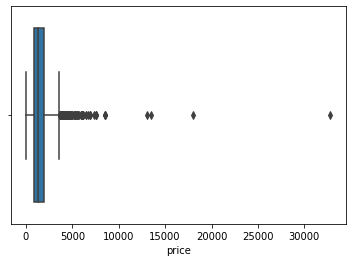

In [21]:
sns.boxplot(df_rent.price)

In [22]:
overview_rent['%n_of_app_distrcitct']  = overview_rent['Number_of_Appartments'].apply(lambda x :(x/overview_rent['Number_of_Appartments'].sum())*100)

In [23]:
overview_rent

Number_of_Appartments        neighborhood  Price  Surface  rooms  \
0                     397           Salamanca   2279      132      3   
1                     312              Centro   1535      103      2   
2                     247            Chamberí   1741      115      2   
3                     214           Chamartín   1958      128      3   
4                     144              Tetuán   1204       86      2   
5                     141           Hortaleza   1899      165      3   
6                     131              Retiro   1636      112      3   
7                     111             Moncloa   2152      164      3   
8                     110       Ciudad Lineal   1198      112      2   
9                      94          Fuencarral   1297      110      3   
10                     69          Arganzuela   1084       79      2   
11                     63            San Blas   1070      100      2   
12                     55         Carabanchel    809       69      2   
13                     45             Barajas   1176      101      2   
14                     39          Villaverde    799       71      2   
15                     25              Latina    778       68      2   
16                     20  Puente de Vallecas    681       65      2   
17                     19   Villa de Vallecas    801       76      2   
18                     14               Usera    817       76      2   
19                     12           Vicálvaro    902       88      3   
20                     11           Moratalaz    971       91      3   

    %n_of_app_distrcitct  
0              17.465904  
1              13.726353  
2              10.866696  
3               9.414870  
4               6.335240  
5               6.203256  
6               5.763308  
7               4.883414  
8               4.839419  
9               4.135504  
10              3.035636  
11              2.771667  
12              2.419710  
13              1.979762  
14              1.715794  
15              1.099868  
16              0.879894  
17              0.835900  
18              0.615926  
19              0.527937  
20              0.483942